In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from datetime import datetime
import re # Módulo para uso de expressões regulares.

In [2]:
# Criando um lista para identificar possíveis valores ausentes
valores_ausentes = ["n/a", "na", "undefined"]

In [3]:
file = 'Relatório Associados Individuais.xls.csv'

In [4]:
# Três
df = pd.read_csv(file, sep=None, engine='python', header=1, na_values= valores_ausentes)

In [7]:
# Alterando os parâmetros do Pandas para aumentar o número de colunas exibidas
pd.set_option('display.max_columns', 100)

In [8]:
# Alterar os parâmetros do Pandas para aumentar o número de caractéres exibidos em cada célula
pd.set_option('display.max_colwidth', 100)

In [76]:
# Alterando o parânetro do Pandas para aumentar o número de linhas exibidas
pd.set_option('display.max_rows', 150)

In [9]:
df.shape

(396, 35)

In [10]:
# Calculando valores ausentes no df
def perc_valores_ausentes(df):
    # calcular o tatoal de células do df
    total_cells = np.prod(df.shape)
    # contar o número de valores ausentes por coluna
    missing_count = df.isnull().sum()
    # calcular o tatal de valores ausentes
    totalMissing = missing_count.sum()
    # calculando o percentual de valores ausentes
    print("O dataset tem", round(((totalMissing / total_cells) * 100), 2), "%", "de valores ausentes")

In [11]:
# Chamando a função para descobrir a porcentagem de valores ausentes no df
perc_valores_ausentes(df)

O dataset tem 12.16 % de valores ausentes


In [12]:
# Função para calcular o percentual de valores ausentes por coluna
def perc_valores_ausentes_cols(df):
    # total de valores ausentes
    mis_val = df.isnull().sum()
    # percentual de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)
    # tipo de dados das colunas com valores ausentes
    mis_val_dtypes = df.dtypes
    # criando uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtypes], axis=1)
    # renomeando as colunas
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Valores Ausentes', 1: '% de Valores Ausentes', 2: 'Dtypes'})
    # classificando a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores ausentes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)

    print("O dataset tem " + str(df.shape[1]) + " colunas.\n"
         "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")
    if mis_val_table_ren_columns.shape[0] == 0:
        return
    # retorna o df com informações ausentes
    return mis_val_table_ren_columns

In [13]:
df_missing = perc_valores_ausentes_cols(df)

O dataset tem 35 colunas.
Encontrado: 20 colunas que têm valores ausentes.


In [14]:
# Criando uma nova coluna com 'Data_Nascimento' com o tipo com o método do Pandas pd.to_datetime()
df['Data_Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d/%m/%Y', errors='coerce')

In [15]:
# Obtendo a data atual
data_atual = pd.to_datetime(datetime.now().date())

In [16]:
print(f"Data Atual para calculo: {data_atual.strftime('%d/%m/%Y')}\n")

Data Atual para calculo: 25/07/2025



In [17]:
# Calculando a idade
# Considerando o dia o mês e o ano do aniversário.
df['Idade_Atual'] = data_atual.year -df['Data_Nascimento'].dt.year

In [18]:
# Ajustar a idade para quem inda não fez aniversário na data corrente
nao_fez_aniver = ((data_atual.month < df['Data_Nascimento'].dt.month) | ((data_atual.month == df['Data_Nascimento'].dt.month) &
                                                                           (data_atual.day < df['Data_Nascimento'].dt.day)))

In [19]:
df.loc[nao_fez_aniver, 'Idade_Atual'] -= 1

In [20]:
# Lidando com NaT (data de nascimento inválida)
df['Idade_Atual'] = df['Idade_Atual'].fillna(0).astype('Int64')

In [21]:
# df.describe(include='object')

In [22]:
# Uma forma mais 'Pythonica' de criar o df_l panas com as idades entre 18 e 86 anos:
idade_minima = 18
idade_maxima = 86

df_l = df[
(df['Idade_Atual'] >= idade_minima) &
(df['Idade_Atual'] <= idade_maxima)
].copy() # Usando o .copy() para garantir que o df_l seja em DataFrame independente

In [23]:
# Definindo os limites e Rótulos das Faixas Etárias.
# Os limites serão os pontos de corte dos intervalos.
# O primeiro limete deve ser o mínimo possível e o último o máximo possível da sua idade.
bins = [0, 18, 25, 35, 45, 55, 65, 75, 86] # Idades (o limite superior é exclusivo por padrão)
# 0s rótulos devem ter um a menos que o número de bins
# Serão os nomes das categorias
labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-86']

In [24]:
# Criando a nova coluna 'Faixa_etaria' usando pd.cut()
df_l['Faixa_etaria'] = pd.cut(df_l['Idade_Atual'],
                             bins=bins,
                             labels=labels,
                             right=True,
                             ordered=True)

In [25]:
# Criando um histograma com os dados da nova variável 'Faixa_etaria'.
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

<Figure size 1200x700 with 0 Axes>

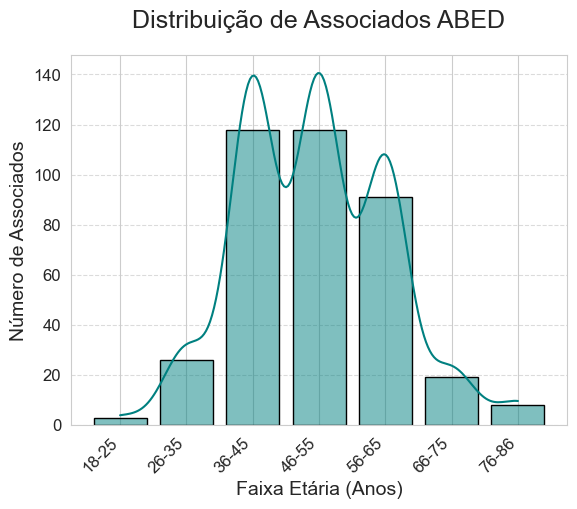

In [26]:
# Usando o sns.histplot com a nova variável categórica
# O parâmetro bins não é mais necessário pois o seaborn usa as categorias existentes
# shrik ajusta a largura das barras para criar espaço entre elas
#hue: se você quiser dividir por outra categoria (ex: gênero)
sns.histplot(data=df_l, x='Faixa_etaria',
            edgecolor='black', color='teal', shrink=0.8, kde=True)

plt.title('Distribuição de Associados ABED', fontsize=18, pad=20)
plt.xlabel('Faixa Etária (Anos)', fontsize=14)
plt.ylabel('Número de Associados', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Distribuição_Associado_ABED.png', dpi=300, bbox_inches='tight')

In [27]:
# Definir o dicionário de Mapeamento UF -> Região
map_regiao = {'AC': 'Norte', 'AM':'Norte', 'AP':'Norte', 'PA':'Norte', 'RO':'Norte', 'RR': 'Norte', 'TO':'Norte',
             'AL':'Nordeste', 'BA':'Nordeste', 'CE':'Nordeste', 'MA':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'RN':'Nordeste', 'SE':'Nordeste',
             'DF':'Centro-Oeste', 'GO':'Centro-Oeste', 'MT':'Centro-Oeste', 'MS':'Centro-Oeste',
             'ES':'Sudeste', 'MG':'Sudeste', 'RJ':'Sudeste', 'SP':'Sudeste',
             'PR':'Sul', 'RS':'Sul', 'SC':'Sul'}

In [28]:
# Criar a nova coluna Região usando o .map()
df_l['Região'] = df_l['UF'].map(map_regiao)

In [29]:
# Transformando a coluna 'Região' em tipo Categorico e atribuindo um ordem explicita
ordem_reg = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
df_l['Região'] = pd.Categorical(df_l['Região'], categories=ordem_reg, ordered=True)

In [30]:
# df_l[['Nome / Responsável', 'UF', 'Região']].head()

In [31]:
# df_l[df_l['Região'].isna()]

In [32]:
# Histograma
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

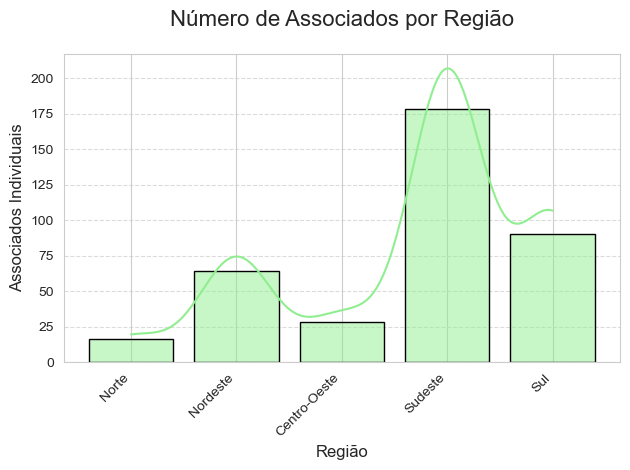

In [33]:
sns.histplot(data=df_l, x='Região', edgecolor='black', color='lightgreen', shrink=0.8, kde=True)

plt.title('Número de Associados por Região', fontsize=16, pad=20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Associados Individuais', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Associação_Ind_Regiao.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Renomeando a coluna 'Documento' para 'CPF'
df_l.rename(columns={'Documento': 'CPF'}, inplace=True)

### Função para Validação de CPF

Valida um CPF brasileiro.
Args:
    cpf_str (str): A string do CPF a ser validada (pode conter pontos, traços, etc.).
Returns:
    str ou None: O CPF validado e padronizado (apenas números) se for válido, caso contrário, retorna None.

In [35]:
def validar_cpf(cpf_str):

    # Lidando com valores NaN ou pd.NA
    if pd.isna(cpf_str):
        return None

    # 1. lIMPEZA: Remover tudo que não for dígito
    cpf = re.sub(r'[^0-9]', '', str(cpf_str))

    # 2. Verificação de Tamanho
    if len(cpf) != 11:
        return None

    # 3. Verificação de dígitos repetidos
    if len(set(cpf)) == 1:
        return None

    # 4. Calculo dos dígitos verificadores (DV)
    # Converendo para lista de inteiros para facilitar os cálculos
    numeros = [int(digit) for digit in cpf]

    # Calculo do primeiro dígito verificador (DV1)
    soma = 0
    for i in range(9):
        soma += numeros[i] * (10 - i)
    dv1 = (soma * 10) % 11
    if dv1 == 10:
        dv1 = 0

    # Verificando se o DV1 calculado é igual ao DV1 fornecido
    if dv1 != numeros[9]:
        return None

    # Verificando o segundo dígito verificador (DV2)
    soma = 0
    for i in range(10):
        soma += numeros[i] * (11 - i)
    dv2 = (soma * 10) % 11
    if dv2 == 10:
        dv2 = 0

    # Verificando se o DV2 calculado é igual ao DV2 fornecido
    if dv2 != numeros[10]:
        return None

    # Se todas as verificações passaram, o CPF é validado.
    # Retorna o CPF padronizado (apenas número)

    return cpf      

        

In [36]:
# Criando uma nova coluna a partir da aplicação da função na variável 'CPF'.
df_l['CPF_validado'] = df_l['CPF'].apply(validar_cpf)

In [37]:
# Tipo de dado
df_l['CPF_validado'].dtype

dtype('O')

In [38]:
# Valores não nulos
df_l['CPF_validado'].count()

376

In [39]:
# Valores nulos
df_l['CPF_validado'].isna().sum()

7

In [77]:
df_l['Formacao'].value_counts()

Formacao
Doutorado                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      23
Mestrado                                     

## Extratégia para Extrair Palavras-Chave usando Expressões Regex 

In [80]:
# Mapeamento com Prioridade (Doutorado, Mestrado, Graduação)
mapa_titulacao_prioridade = {r'Doutorado':['doutor', r'doutorado', r'Doutor', r'DOUTOR', r'DOUTORADO', r'Doutora', r'DOUTORA', r'Dra.', r'dr.', r'dr', r'dra', r'DR', r'DRA'],
                            'Mestrado': [r'mestre', r'mestra', r'MESTRE', r'MESTRA', r'mestrado', r'MESTRADO', r'Mestre', r'Mestra'],
                            }

In [81]:
# Definindo a ordem explicita de prioridade
ordem_de_prioridade = ['Doutorado', 'Mestrado', 'Graduação', 'Outros', 'Não Informado']

In [84]:
# Função para categorizar Titulação
def categorizar_titulacao(formacao_texto):
    if pd.isna(formacao_texto):
        return 'Não Informado'

    texto_limpo = str(formacao_texto).lower()

    encontradas = []
    for titulacao, padroes in mapa_titulacao_prioridade.items():
        for padrao in padroes:
            if re.search(padrao, texto_limpo):
                return titulacao # Retorna a primeira titulação que corresponder, seguindo a ordem do dicionário
    return 'Graduação (lato sensu)'
# Criação da variável 'Titulacao' e utilização da função para conseguir os valores a partir da variável 'Formacao'
df_l['Titulacao'] = df_l['Formacao'].apply(categorizar_titulacao)


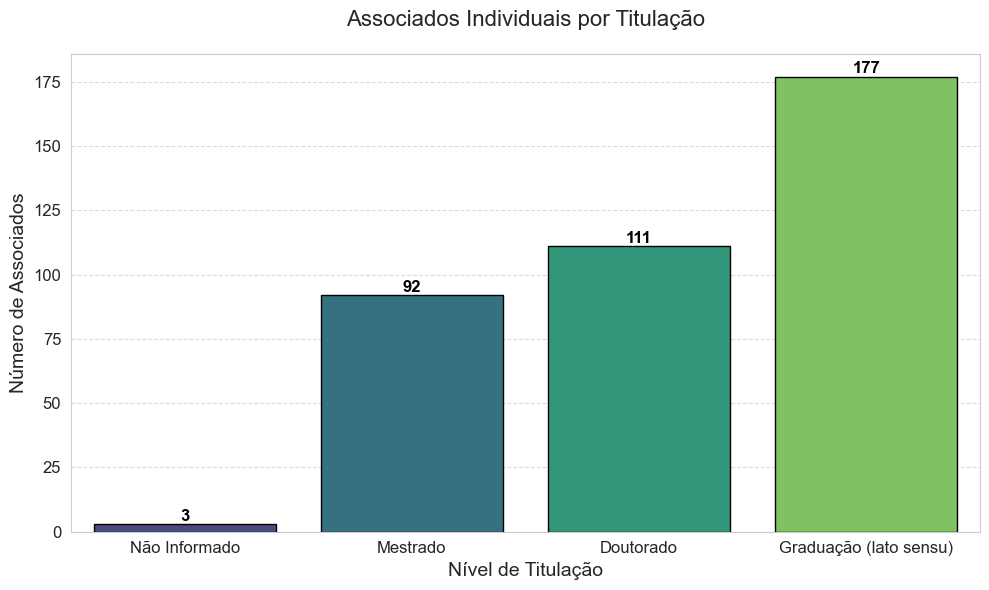

In [128]:
# Plotando a variável 'Titulacao' com o método .countplot() do seaborn
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

#Criando o gráfico de barras
ax = sns.countplot(
    data=df_l,
    x='Titulacao',         # A variável categórica no eixo X
    palette='viridis',
    hue='Titulacao',       # Escolhe uma paleta de cores (opcional, mas melhora a estética)
    edgecolor='black',
    legend=False        # Cor da borda das barras
               )

# Títulos e Rótulos
plt.title('Associados Individuais por Titulação', fontsize=16, pad=20)
plt.xlabel('Nível de Titulação', fontsize=14)
plt.ylabel('Número de Associados', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores nas barras:
# ax.patches é uma lista de todos as barras desenhadas no gráfico

for p in ax.patches:
    v_offset = 6 # Ajustar o valor conforme o tamanho da barra

    ax.text(p.get_x() + p.get_width() / 2.,
           p.get_height() + v_offset,
           f'{int(p.get_height())}',
           ha='center',
           va='top',
           fontsize=12,
           color='black',
           fontweight='bold'
           )

plt.tight_layout()

plt.savefig('Associados_Titulação.png', dpi=300, bbox_inches='tight')



